# 1D reaction-diffusion master equation simulation to determine cell growth direction 
nicole pagane
10/24/17

## import necessary modules for program

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

## parameters that can be changed

In [2]:
# temperature
T = 295 #K

#viscosity of solution
eta = 1e-3 #Pa*s

#radius of substrate
r = 1e-9 #m

#one-dimensional length of lattice gradient
L = 1.0e-3 #m

#number of compartments **INCLUDING THE 2 CONSTANT BOUNDARY CELLS**
K = 10

#iterations of the gillepsie algorithm
n = 100000

#how many runs to stochasticly simulate to get overall distribution
Sim = 50

#original far left and far right compartment species numbers
N = {}
N['A'] = np.asarray([5, 20])

## define equations and constants

In [3]:
Kb = 1.38e-23 #J/K
D = (Kb*T)/(6*np.pi*eta*r)
N['D'] = D
N['L'] = L
N['K'] = K

# gillespie with constant boundary concentrations
def gillespieBoundary(N, n):
    L = N['L']
    K = N['K']
    D = N['D']
    h = L/K
    d = D/(h**2)
    tt = 0
    x = np.zeros(K)
    x[1:K-1] = np.random.randint(1,max(N['A'][0],N['A'][1]),K-2)
    x[0] = N['A'][0]
    x[-1] = N['A'][1]
    Ntot = np.sum(x)
    tvec = np.zeros(n)
    xmat = np.matrix(np.zeros([n+1,K]))
    xmat[0,:] = x
    for i in range(0,n):
        a = x*d
        Ntot = np.sum(x)
        a0 = 2*d*Ntot - d*x[0] - d*x[-1]
        tt = tt + np.random.exponential(1/a0,1)
        rand = np.random.random()
        if rand < np.sum(a[0:K-1])/a0:
            # j from 0 to K-1
            for j in range(0,K-1):
                if rand >= np.sum(a[0:j])/a0 and rand < np.sum(a[0:j+1])/a0:
                    break
            x[j] = x[j] - 1
            x[j+1] = x[j+1] + 1
            x[0:j-1] = x[0:j-1]
            x[j+2:] = x[j+2:]
        if rand >= np.sum(a[0:K-1])/a0:
            # j from 1 to K
            for j in range(1,K):
                if rand >= (np.sum(a[0:K-1]) + np.sum(a[1:j]))/a0 and rand < (np.sum(a[0:K-1]) + np.sum(a[1:j+1]))/a0:
                    break
            x[j] = x[j] - 1
            x[j-1] = x[j-1] + 1
            x[0:j-2] = x[0:j-2]
            x[j+1:] = x[j+1:]
        tvec[i] = tt
        x[0] = N['A'][0]
        x[-1] = N['A'][1]
        xmat[i+1,:] = x
    return np.asarray([tvec, xmat])

## reaction diffusion simulation

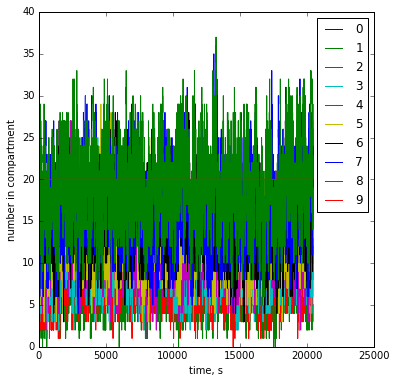

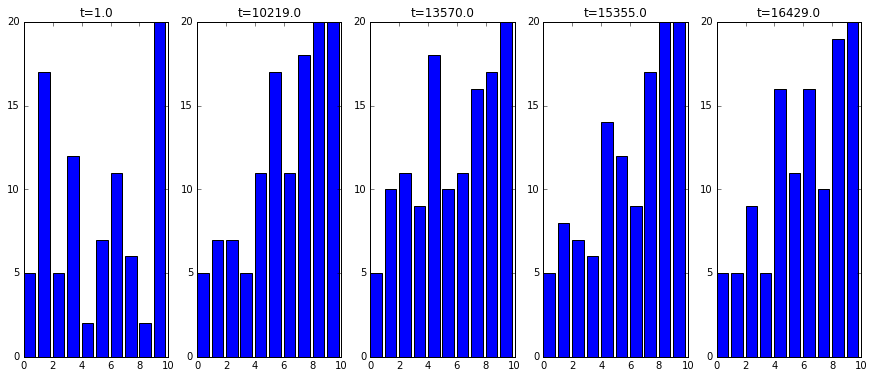

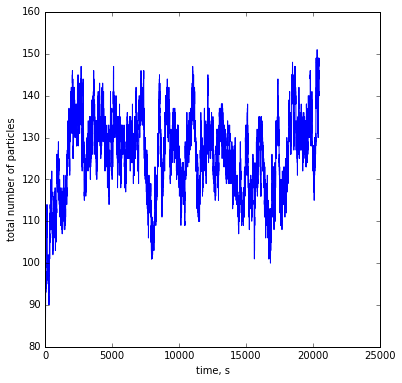

In [4]:
#reaction diffusion keeping the far cells at constant concentration
out = gillespieBoundary(N, n)
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
for i in range(K):
    ax.plot(out[0],out[1][:,i][0:n])
    
ax.set_xlabel('time, s')
ax.set_ylabel('number in compartment')
ax.legend(''.join(np.asarray(np.linspace(0, K-1, K, dtype = 'int'), dtype='string')))

pltnum = 5
fig = plt.figure(figsize=(15,6))
maxInd = len(out[0])
for i in range(0, pltnum):
    ind = maxInd - maxInd/(i+1)
    ax = fig.add_subplot(1,pltnum,i+1)
    ax.bar(range(np.size(out[1][ind])),out[1][ind].tolist()[0], align='edge')
    plt.title(''.join(['t=', str(np.ceil(out[0][ind]))]))

# plot number of molecules per time
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.plot(out[0], np.sum(out[1],1)[0:n])
ax.set_xlabel('time, s')
ax.set_ylabel('total number of particles')

plt.show()

## multiple simulations to see overall distribution

In [5]:
out = {}
for i in range(0,Sim):
    out[i] = gillespieBoundary(N, n)
print('done')

done


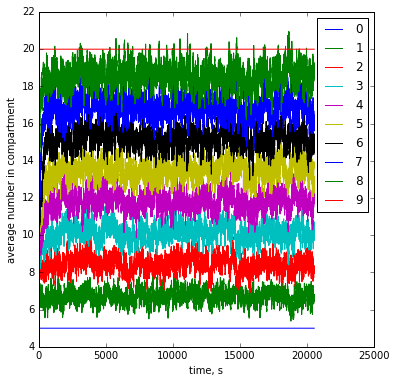

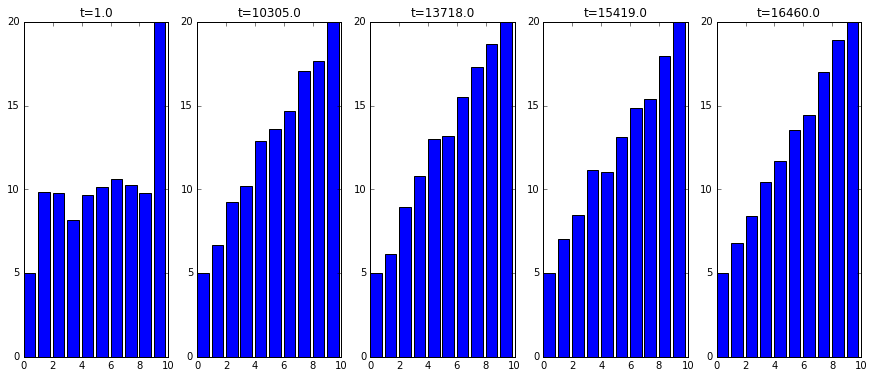

In [6]:
#plot here to avoid having to run the simulations again
timemeans = np.zeros(n)
runmeans = np.zeros([n+1,K])
for i in range(0,Sim):
    timemeans += out[i][0]
    runmeans += out[i][1]
    
timemeans = timemeans/Sim
runmeans = runmeans/Sim

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.plot(timemeans, runmeans[0:len(timemeans)])
ax.set_xlabel('time, s')
ax.set_ylabel('average number in compartment')
ax.legend(''.join(np.asarray(np.linspace(0, K-1, K, dtype = 'int'), dtype='string')))

pltnum = 5
fig = plt.figure(figsize=(15,6))
maxInd = len(runmeans)
for i in range(0, pltnum):
    ind = maxInd - maxInd/(i+1)
    ax = fig.add_subplot(1,pltnum,i+1)
    ax.bar(range(len(runmeans[0])),runmeans[ind], align='edge')
    plt.title(''.join(['t=', str(np.ceil(timemeans[ind]))]))

plt.show()

## find mutual information for cell budding direction in center subspace

for simplification, change from 10 cells to 4 and run 50 simulations to get overall distribution

In [7]:
K = 4
N['K'] = K

out = {}

for i in range(0,Sim):
    out[i] = gillespieBoundary(N, n)
print('done')

done


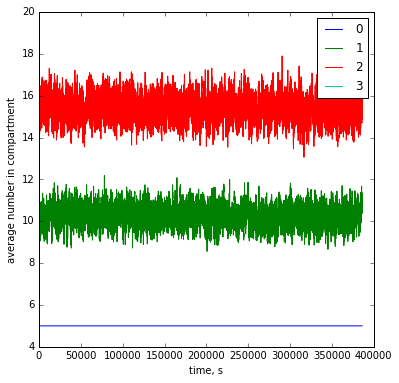

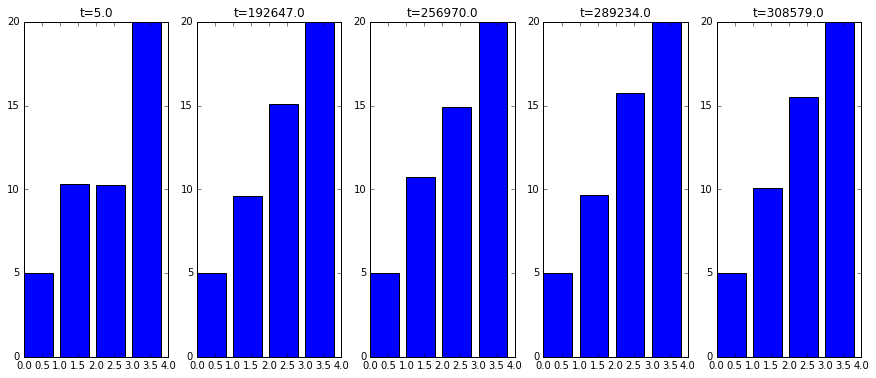

In [8]:
#plot here to avoid having to run the simulations again
timemeans = np.zeros(n)
runmeans = np.zeros([n+1,K])
for i in range(0,Sim):
    timemeans += out[i][0]
    runmeans += out[i][1]
    
timemeans = timemeans/Sim
runmeans = runmeans/Sim

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.plot(timemeans, runmeans[0:len(timemeans)])
ax.set_xlabel('time, s')
ax.set_ylabel('average number in compartment')
ax.legend(''.join(np.asarray(np.linspace(0, K-1, K, dtype = 'int'), dtype='string')))

pltnum = 5
fig = plt.figure(figsize=(15,6))
maxInd = len(runmeans)
for i in range(0, pltnum):
    ind = maxInd - maxInd/(i+1)
    ax = fig.add_subplot(1,pltnum,i+1)
    ax.bar(range(len(runmeans[0])),runmeans[ind], align='edge')
    plt.title(''.join(['t=', str(np.ceil(timemeans[ind]))]))


#fig = plt.figure(figsize=(6,6))
#ax = fig.gca()
#diffs = np.zeros(n+1)
#for i in range(K-1):
#    diffs += runmeans[:,i+1] - runmeans[:,i] 

#ax.set_xlabel('time, s')
#ax.set_ylabel('number in compartment')


plt.show()

find the probability distribution for delta n = subvolume 3 - subvolume 2 ([2-1]) *assuming that the yeast cell is placed between these 2 cells*

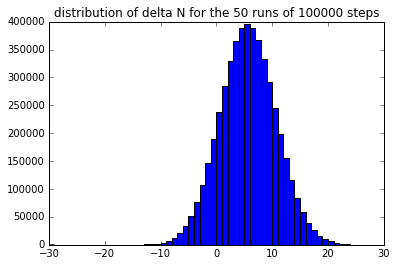

In [16]:
# append all the deltaN values for the 50 runs to determine distribution
allDeltaN = []
for i in range(Sim):
    for j in range(len(out[i][1])):
        deltaN = out[i][1][j,2] - out[i][1][j,1]
        allDeltaN.append(deltaN)

#bins = np.linspace(min(allDeltaN), max(allDeltaN), max(allDeltaN) - min(allDeltaN) + 1)
binLength = abs(N['A'][1] - N['A'][0])*2
bins = np.linspace(-binLength, binLength, 2*binLength + 1)
x, bins, patches = plt.hist(allDeltaN, bins = bins)
#divide by bin length to make probability density (bin length here is 1)
normedx = x/np.sum(x)
plt.title(''.join(['distribution of delta N for the ', str(Sim), ' runs of ', str(n), ' steps']))
plt.show()

define entropy equations to determine mutual information for cell decision

In [34]:
#define equation for entropy for the particle difference of the 2 surrounding cells
def H_particles(diff, normedx, bins):
    for i in range(len(bins)-1):
        if bins[i] <= diff <= bins[i+1]:
            break
        i = len(bins)
    if i == len(bins):
        ans = 0
        prob = 0
    else:
        prob = normedx[i]
        ans = -prob*np.log2(prob)
    return ans, prob

#define entropy for unbiased cell (.5)
p_cell = .5
H_cell = .5 # -.5*np.log2(.5)

#define joint entropy for the particle distribution and cell choice
def H_joint(diff, normedx, bins):
    #H_part, p_part = H_particles(diff, normedx, bins)
    #p_joint = p_cell*p_part
    #return -p_joint*np.log2(p_cell)
    if diff == 0:
        return .5
    else:
        return 0


#define mutual information
def MI(diff, normedx, bins):
    #return H_particles(diff, normedx, bins) + H_cell - H_joint(diff, normedx, bins)
    return H_cell - H_joint(diff, normedx, bins)


run simulations to see the correlations between information and concentration gradient 

In [36]:
deltaN = np.zeros([n+1,1])
I = np.zeros([n+1,1])
for i in range(Sim):
    diff = out[i][1][:,2] - out[i][1][:,1]
    deltaN += diff
    info = np.zeros([len(diff),1])
    for j in range(len(diff)):
        info[j] = MI(diff[j], normedx, bins)
    I += info
    #print(''.join(['run ', str(i+1), ' of ', str(Sim), ' completed']))
    
deltaN = deltaN/Sim
I = I/Sim
print('done')

done


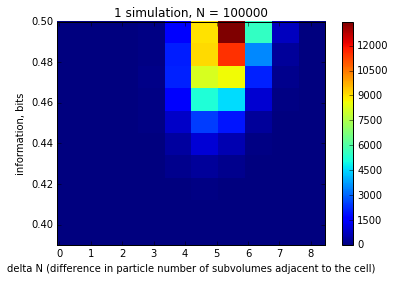

In [37]:
# plot here to get general idea of information given one run of the reaction diffusion simulation
#unpack values
info = []
dN = []
for i in range(len(I)):
    info.append(I[i][0])
    dN.append(deltaN[i][0])
    
plt.hist2d(dN, info) #, bins = [np.linspace(min(dN), max(dN), len(dN)), np.linspace(min(info), max(info), len(info))])
plt.xlabel('delta N (difference in particle number of subvolumes adjacent to the cell)')
plt.ylabel('information, bits')
plt.title(''.join(['1 simulation, N = ', str(n)]))
plt.colorbar()

plt.show()

# change boundary concentrations to plot information vs  gradient

In [38]:
cN = 10
B1 = np.linspace(0,20,cN)
B2 = np.linspace(20,0,cN)
runsAvg = {}
runs = {}
n = 5000
Sim = 35
for iter in range(cN):
    N['A'] = np.asarray([B1[iter], B2[iter]])
    out = {}
    for i in range(0,Sim):
        out[i] = gillespieBoundary(N, n)
    print(''.join([str(iter+1), ' of ', str(cN), ' simulations done with ', str(Sim), ' runs and ', str(n), ' timesteps']))
    runs[iter] = out
    timemeans = np.zeros(n)
    runmeans = np.zeros([n+1,K])
    for i in range(0,Sim):
        timemeans += out[i][0]
        runmeans += out[i][1]
    timemeans = timemeans/Sim
    runmeans = runmeans/Sim
    runsAvg[iter] = np.asarray([timemeans, runmeans]) 
print('done') 

1 of 10 simulations done with 35 runs and 5000 timesteps
2 of 10 simulations done with 35 runs and 5000 timesteps
3 of 10 simulations done with 35 runs and 5000 timesteps
4 of 10 simulations done with 35 runs and 5000 timesteps
5 of 10 simulations done with 35 runs and 5000 timesteps
6 of 10 simulations done with 35 runs and 5000 timesteps
7 of 10 simulations done with 35 runs and 5000 timesteps
8 of 10 simulations done with 35 runs and 5000 timesteps
9 of 10 simulations done with 35 runs and 5000 timesteps
10 of 10 simulations done with 35 runs and 5000 timesteps
done


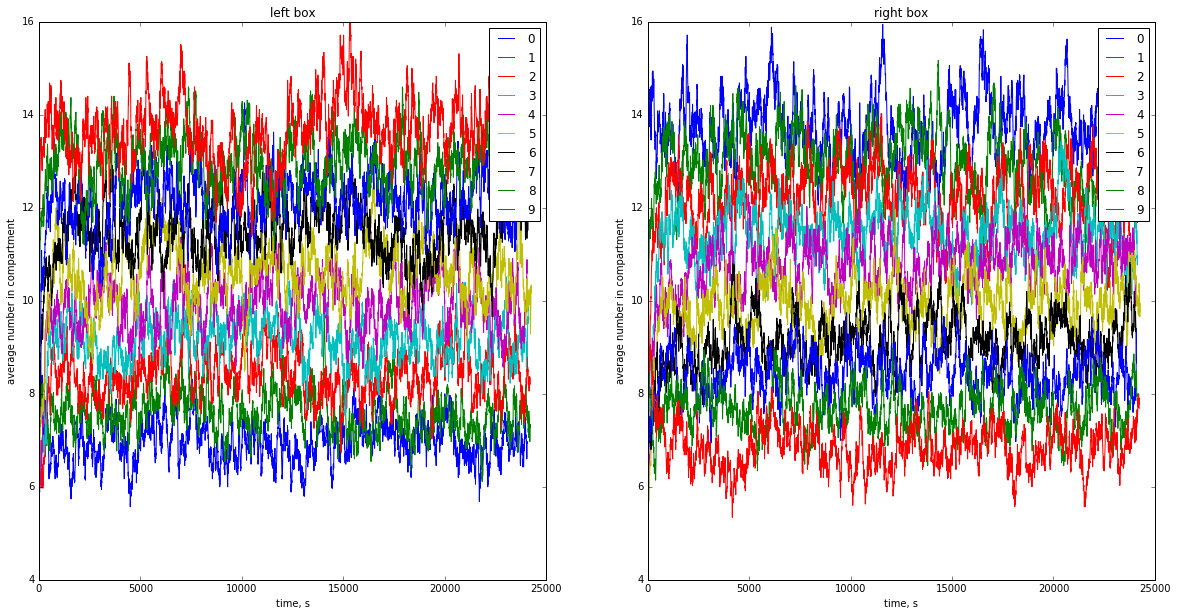

0	left: 0.0	right: 20.0
1	left: 2.22222222222	right: 17.7777777778
2	left: 4.44444444444	right: 15.5555555556
3	left: 6.66666666667	right: 13.3333333333
4	left: 8.88888888889	right: 11.1111111111
5	left: 11.1111111111	right: 8.88888888889
6	left: 13.3333333333	right: 6.66666666667
7	left: 15.5555555556	right: 4.44444444444
8	left: 17.7777777778	right: 2.22222222222
9	left: 20.0	right: 0.0


In [39]:
# plot the actual particle distrubutions for each gradient
#left
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
for i in range(cN):
    ax.plot(runsAvg[i][0], runsAvg[i][1][:,1][0:len(timemeans)])

ax.set_xlabel('time, s')
ax.set_ylabel('average number in compartment')
ax.legend(''.join(np.asarray(np.linspace(0, cN-1, cN, dtype = 'int'), dtype='string')))
ax.set_title('left box')

#right
ax = fig.add_subplot(1,2,2)
for i in range(cN):
    ax.plot(runsAvg[i][0], runsAvg[i][1][:,2][0:len(timemeans)])

ax.set_xlabel('time, s')
ax.set_ylabel('average number in compartment')
ax.legend(''.join(np.asarray(np.linspace(0, cN-1, cN, dtype = 'int'), dtype='string')))
ax.set_title('right box')

plt.show()
for i in range(cN):
    print(''.join([str(i), '\t', 'left: ', str(B1[i]), '\tright: ', str(B2[i])]))

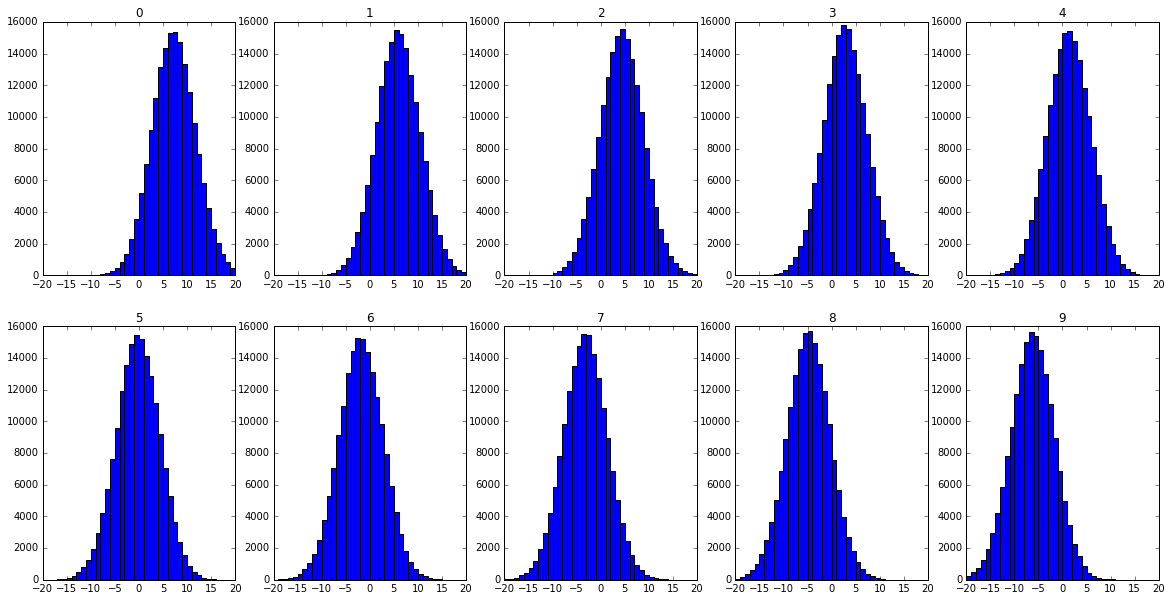

In [40]:
# append all the deltaN values for the 35 runs of each gradient to determine distribution

allDeltaN = {}
for iter in range(cN):
    allDeltaN[iter] = []
    for i in range(Sim):
        for j in range(len(out[i][1])):
            deltaN = runs[iter][i][1][j,2] - runs[iter][i][1][j,1]
            allDeltaN[iter].append(deltaN)
        
        
normed = {}
#binned = {}
fig = plt.figure(figsize=(20,10))
for iter in range(cN):
    ax = fig.add_subplot(2,5,1+iter)
    #bins = np.linspace(min(allDeltaN[iter]), max(allDeltaN[iter]), max(allDeltaN[iter]) - min(allDeltaN[iter]) + 1)
    x, bins, patches = ax.hist(allDeltaN[iter], bins = bins)
    ax.set_xlim([-20,20])
    normedx = x/np.sum(x)
    normed[iter] = normedx
    #binned[iter] = bins
    plt.title(str(iter))

plt.show()

In [41]:
dNa = {}
Ia = {}
for iter in range(cN):
    # reassign normedx and bins variables for the necessary information functions
    normedx = normed[iter]
    #bins = binned[iter]
    deltaN = np.zeros([n+1,1])
    I = np.zeros([n+1,1])
    for i in range(Sim):
        diff = runs[iter][i][1][:,2] - runs[iter][i][1][:,1]
        deltaN += diff
        info = np.zeros([len(diff),1])
        for j in range(len(diff)):
            info[j] = MI(diff[j], normedx, bins)
        I += info
    dNa[iter] = deltaN
    Ia[iter] = I 
    print(''.join(['information ', str(iter+1), ' of ', str(cN), ' gradient combinations computed']))

# normalize
for iter in range(cN):
    dNa[iter] = dNa[iter]/Sim
    Ia[iter] = Ia[iter]/Sim
    
print('done')

information 1 of 10 gradient combinations computed
information 2 of 10 gradient combinations computed
information 3 of 10 gradient combinations computed
information 4 of 10 gradient combinations computed
information 5 of 10 gradient combinations computed
information 6 of 10 gradient combinations computed
information 7 of 10 gradient combinations computed
information 8 of 10 gradient combinations computed
information 9 of 10 gradient combinations computed
information 10 of 10 gradient combinations computed
done


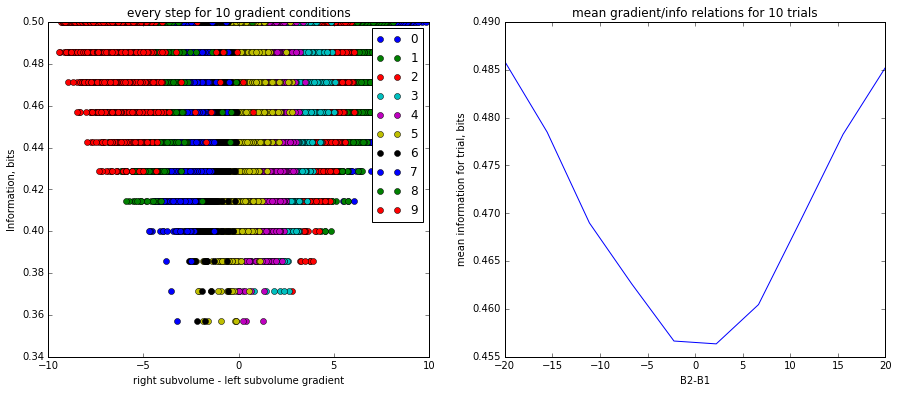

In [64]:
# plot here to get general idea of information given one run of the reaction diffusion simulation
#unpack values
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,2,1)
for iter in range(cN):
    ax.plot(dNa[iter], Ia[iter], 'o')

ax.legend(''.join(np.asarray(np.linspace(0, cN-1, cN, dtype = 'int'), dtype='string')))
ax.set_xlabel('right subvolume - left subvolume gradient')
ax.set_ylabel('Information, bits')
ax.set_title('every step for 10 gradient conditions')

Imean = []
bounds = []
ymin = []
ymax = []
for iter in range(cN):
    Imean.append(np.mean(Ia[iter]))
    ymin.append(Imean[-1] - np.std(Ia[iter]))
    ymax.append(Imean[-1] + np.std(Ia[iter]))
    bounds.append(B2[iter] - B1[iter])
    
ax = fig.add_subplot(1,2,2)
ax.plot(bounds, Imean)
ax.set_ylabel('mean information for trial, bits')
ax.set_xlabel('B2-B1')
ax.set_title('mean gradient/info relations for 10 trials')
plt.show()

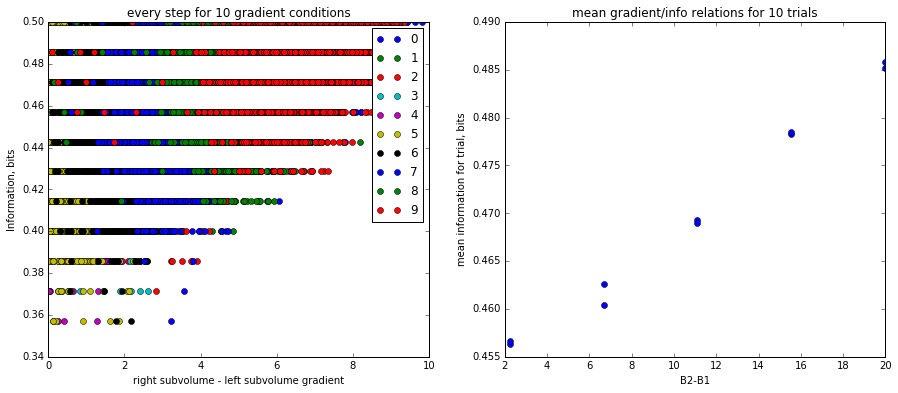

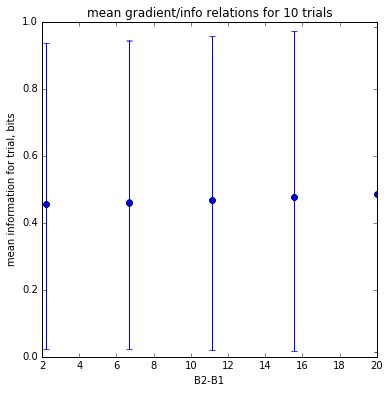

In [66]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,2,1)
for iter in range(cN):
    ax.plot(np.abs(dNa[iter]), Ia[iter], 'o')

ax.legend(''.join(np.asarray(np.linspace(0, cN-1, cN, dtype = 'int'), dtype='string')))
ax.set_xlabel('right subvolume - left subvolume gradient')
ax.set_ylabel('Information, bits')
ax.set_title('every step for 10 gradient conditions')

ax = fig.add_subplot(1,2,2)
ax.plot(np.abs(bounds), Imean, 'o')
ax.set_ylabel('mean information for trial, bits')
ax.set_xlabel('B2-B1')
ax.set_title('mean gradient/info relations for 10 trials')

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.errorbar(np.abs(bounds), Imean, yerr = [ymin, ymax], fmt = 'o')
ax.set_ylabel('mean information for trial, bits')
ax.set_xlabel('B2-B1')
ax.set_title('mean gradient/info relations for 10 trials')

plt.show()